<a href="https://colab.research.google.com/github/NPranaya7/Data_690_Pranaya/blob/main/Assignment_05/A_05_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment_05
- Narava Pranay Manikanta
- MT50255

## Part-02

### Working with code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

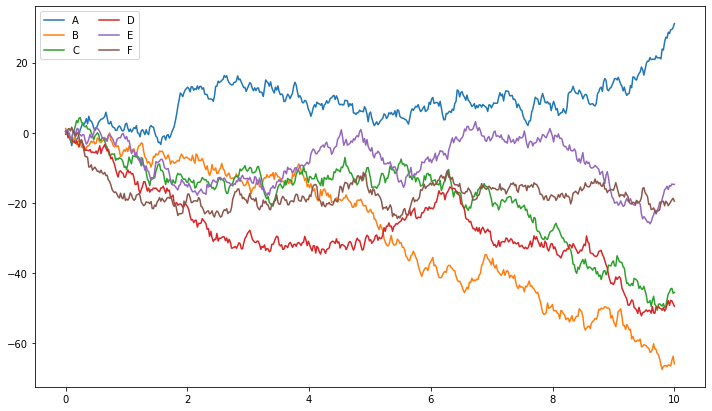

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

### Interacting with data

In [4]:
import requests
import pandas as pd

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-26 04:11:05.285670')

In [7]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [12]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 05:00:00,39423.55,39488.93,39274.31,39376.99,20.257320,7.984441e+05
2022-02-26 06:00:00,39385.74,39411.15,38974.68,39054.26,45.840670,1.795810e+06
2022-02-26 07:00:00,39040.81,39247.96,39027.33,39163.28,29.522115,1.156164e+06
2022-02-26 08:00:00,39178.00,39240.47,38979.77,39227.40,30.429355,1.191532e+06
2022-02-26 09:00:00,39219.53,39559.22,38695.24,38792.49,57.297222,2.236784e+06


In [9]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,41285.958402,41531.518757,41027.486331,41286.696331,90.608687,3.774612e+06
std,2293.243686,2310.900820,2283.811643,2295.495348,93.253024,3.937059e+06
min,37408.050000,37824.480000,37015.740000,37410.010000,4.595978,1.785289e+05
25%,39100.840000,39247.960000,38854.550000,39079.970000,28.690754,1.182265e+06
50%,41441.610000,41558.950000,41251.380000,41439.510000,56.021734,2.250032e+06
75%,43536.140000,43859.520000,43333.000000,43564.730000,112.331332,4.576964e+06
max,44858.140000,45332.380000,44454.990000,44822.340000,527.540571,2.270716e+07


In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 05:00:00,2795.97,2823.48,2795.97,2809.71,297.174400,8.340020e+05
2022-02-26 06:00:00,2810.35,2811.61,2773.79,2777.20,277.442466,7.734126e+05
2022-02-26 07:00:00,2777.75,2792.55,2777.75,2779.96,90.181525,2.510643e+05
2022-02-26 08:00:00,2781.20,2792.15,2759.48,2791.19,259.357454,7.190108e+05
2022-02-26 09:00:00,2794.33,2815.46,2744.44,2755.69,579.894503,1.617162e+06


In [10]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,2811.090769,2829.917633,2789.919822,2810.374142,529.669437,1.490018e+06
std,123.501029,124.633533,123.215156,124.153301,423.817856,1.183651e+06
min,2593.600000,2616.830000,2558.900000,2595.000000,25.485507,6.687602e+04
25%,2726.200000,2737.170000,2709.110000,2724.860000,231.527263,6.697746e+05
50%,2809.900000,2823.630000,2788.110000,2809.100000,403.617870,1.145857e+06
75%,2923.690000,2935.710000,2906.290000,2925.000000,655.915702,1.896493e+06
max,3020.000000,3045.710000,2991.440000,3020.540000,2283.844474,6.377381e+06


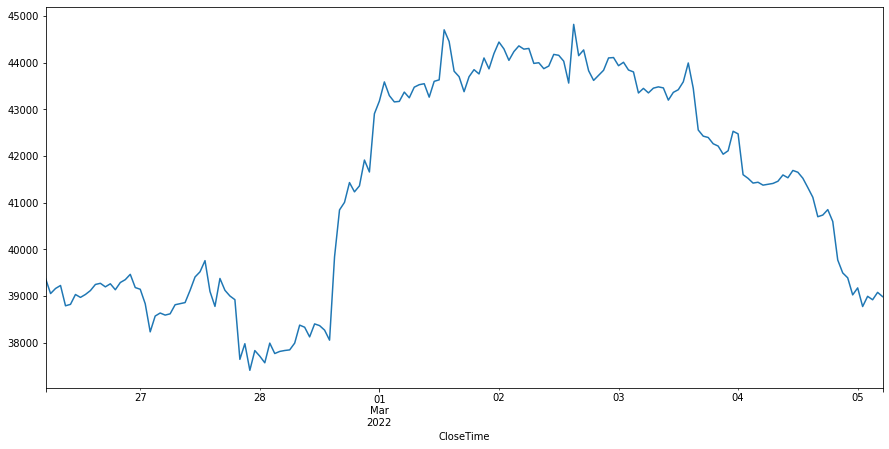

In [11]:
btc['ClosePrice'].plot(figsize=(15, 7))

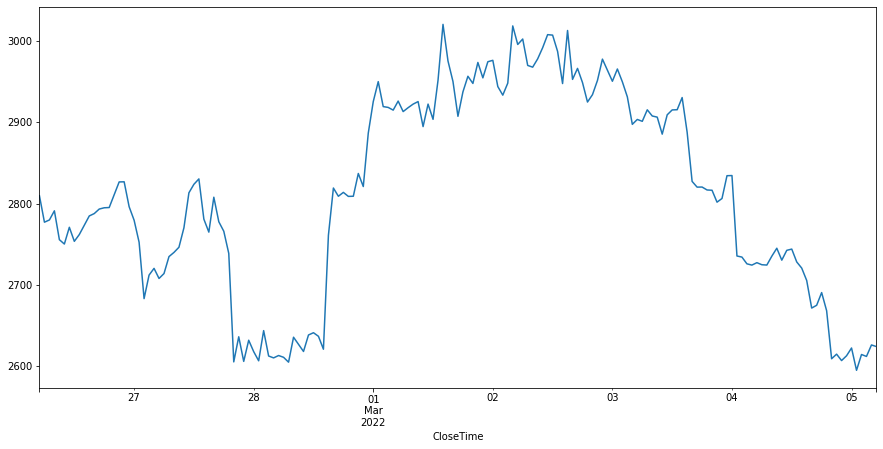

In [14]:
eth['ClosePrice'].plot(figsize=(15, 7))

### Dynamic plots with Bokeh

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

In [16]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

- interactive plot

### Exporting to Excel

In [17]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [18]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [19]:
eth.to_excel(writer, sheet_name='Ether')

In [20]:
writer.save()